In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
df=pd.read_csv('/content/cleaned_personality_dataset.csv')
df

,Unnamed: 0,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,4.0,0,4.0,6.0,0,13.0,5.0,0
1,1,9.0,1,0.0,0.0,1,0.0,3.0,1
2,4,3.0,0,9.0,4.0,0,8.0,5.0,0
3,5,1.0,0,7.0,5.0,0,6.0,6.0,0
4,6,4.0,0,9.0,3.0,0,7.0,7.0,0
...,...,...,...,...,...,...,...,...,...
2493,2895,3.0,0,7.0,6.0,0,6.0,6.0,0
2494,2896,3.0,0,8.0,3.0,0,14.0,9.0,0
2495,2897,4.0,1,1.0,1.0,1,4.0,0.0,1
2496,2898,11.0,1,1.0,3.0,1,2.0,0.0,1


In [63]:
df = df.rename(columns={'Unnamed: 0': 'id'})
display(df.head())

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,4.0,0,4.0,6.0,0,13.0,5.0,0
1,1,9.0,1,0.0,0.0,1,0.0,3.0,1
2,4,3.0,0,9.0,4.0,0,8.0,5.0,0
3,5,1.0,0,7.0,5.0,0,6.0,6.0,0
4,6,4.0,0,9.0,3.0,0,7.0,7.0,0


In [64]:
df['id'].nunique()

2498

In [65]:
df.shape

(2498, 9)

In [66]:
df.set_index("id", inplace = True) # making id to the index

In [67]:
df.isnull().sum()

,0
Time_spent_Alone,0
Stage_fear,0
Social_event_attendance,0
Going_outside,0
Drained_after_socializing,0
Friends_circle_size,0
Post_frequency,0
Personality,0


In [68]:
df.duplicated().sum()

np.int64(0)

In [69]:
df.corr()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
Time_spent_Alone,1.000000,0.835904,-0.717585,-0.733913,0.834174,-0.698716,-0.709264,0.698668
Stage_fear,0.835904,1.000000,-0.820761,-0.846110,0.949544,-0.798804,-0.811519,0.825953
Social_event_attendance,-0.717585,-0.820761,1.000000,0.719483,-0.819694,0.706114,0.710030,-0.697706
Going_outside,-0.733913,-0.846110,0.719483,1.000000,-0.843597,0.707923,0.741060,-0.714027
Drained_after_socializing,0.834174,0.949544,-0.819694,-0.843597,1.000000,-0.794008,-0.808464,0.824296
Friends_circle_size,-0.698716,-0.798804,0.706114,0.707923,-0.794008,1.000000,0.672576,-0.662212
Post_frequency,-0.709264,-0.811519,0.710030,0.741060,-0.808464,0.672576,1.000000,-0.694253
Personality,0.698668,0.825953,-0.697706,-0.714027,0.824296,-0.662212,-0.694253,1.000000


In [70]:
for i in df.select_dtypes(include=['int','float']).columns:
    print(i, df[i].unique())

Time_spent_Alone [ 4.        9.        3.        1.        2.       10.        0.
  6.        5.        8.        4.505816  7.       11.      ]
Stage_fear [0 1]
Social_event_attendance [ 4.          0.          9.          7.          8.          1.
  3.          6.          5.         10.          2.          3.96335447]
Going_outside [6. 0. 4. 5. 3. 1. 7. 2.]
Drained_after_socializing [0 1]
Friends_circle_size [13.          0.          8.          6.          7.         15.
  4.         14.          1.         10.         12.         11.
  9.          2.          3.          5.          6.26886291]
Post_frequency [ 5.          3.          6.          7.          8.          0.
 10.          4.          2.          9.          1.          3.56472663]
Personality [0 1]


In [71]:
df.shape

(2498, 8)

In [72]:
continuous = ['Time_spent_Alone','Social_event_attendance','Going_outside','Friends_circle_size','Post_frequency']
categories = ['Stage_fear','Drained_after_socializing','Personality']

## **two sample ttest**

In [73]:
from scipy import stats

In [74]:
#continious vs continious
def two_sample(d1,d2):
  t=0
  f=0
  for i in  range(31):
    sample1=d1.sample(frac=0.03)
    sample2=d2.sample(frac=0.03)
    t_test,p_value=stats.ttest_ind(sample1,sample2)
    if p_value < 0.1:
      f=f+1
    else:
      t=t+1
  if t>f:
    return True
  else:
    return False

In [75]:
two_sample(df["Time_spent_Alone"],df["Post_frequency"])

True

## **Chisquare test**

In [76]:
#cat vs cat
def chisquare_cat_vs_cat(d1,d2):
    return True if stats.chi2_contingency(pd.crosstab(d1,d2))[1] < 0.1 else False

In [77]:
chisquare_cat_vs_cat(df["Stage_fear"],df["Personality"])

True

## **Annova Test**

In [78]:
#continious(d1) vs cat(d2)
def annova_test(d1,d2):
    group= df[d2].unique()
    data = {}
    for i in group:
        data[i]=df[d1][df[d2]==i]
    f_value,p_value=stats.f_oneway(*[i for i in data.values()])
    return False if p_value < 0.1 else True

In [79]:
annova_test("Time_spent_Alone","Personality")

False

## Conclusion

In [80]:
final = {}
# Exclude datetime columns from the list of columns to iterate through
cols_to_analyze = [col for col in df.columns if col not in ['diagnosis_date', 'end_treatment_date']]

for i in cols_to_analyze:
    final[i]={}
    for j in cols_to_analyze:
        if (i in continuous) and (j in continuous):
            result=two_sample(df[i],df[j])
        elif (i in continuous) and (j in categories):
            result=annova_test(i,j)
        elif (i in categories) and (j in continuous):
            result=annova_test(j,i)
        elif (i in categories) and (j in categories):
            result=chisquare_cat_vs_cat(df[i],df[j])
        else:
            # If the columns are of mixed types not covered by the above or one is a date, skip the test
            continue

        if result:
            final[i][j]=1
        else:
            final[i][j]=0

In [81]:
import pprint

In [82]:
pprint.pprint(final)

{'Drained_after_socializing': {'Drained_after_socializing': 1,
                               'Friends_circle_size': 0,
                               'Going_outside': 0,
                               'Personality': 1,
                               'Post_frequency': 0,
                               'Social_event_attendance': 0,
                               'Stage_fear': 1,
                               'Time_spent_Alone': 0},
 'Friends_circle_size': {'Drained_after_socializing': 0,
                         'Friends_circle_size': 1,
                         'Going_outside': 0,
                         'Personality': 0,
                         'Post_frequency': 0,
                         'Social_event_attendance': 0,
                         'Stage_fear': 0,
                         'Time_spent_Alone': 0},
 'Going_outside': {'Drained_after_socializing': 0,
                   'Friends_circle_size': 0,
                   'Going_outside': 1,
                   'Personality': 0,
    

In [83]:
final_df = pd.DataFrame(final)
final_df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
Time_spent_Alone,1,0,1,0,0,0,1,0
Stage_fear,0,1,0,0,1,0,0,1
Social_event_attendance,1,0,1,0,0,0,1,0
Going_outside,0,0,0,1,0,0,1,0
Drained_after_socializing,0,1,0,0,1,0,0,1
Friends_circle_size,0,0,0,0,0,1,0,0
Post_frequency,1,0,1,1,0,0,1,0
Personality,0,1,0,0,1,0,0,1


In [84]:
# prompt: I want to create this final_df as csv file

final_df.to_csv('final_df.csv')
print("final_df has been saved to final_df.csv")

final_df has been saved to final_df.csv


In [85]:
pd.read_csv('/content/final_df.csv')

,Unnamed: 0,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,Time_spent_Alone,1,0,1,0,0,0,1,0
1,Stage_fear,0,1,0,0,1,0,0,1
2,Social_event_attendance,1,0,1,0,0,0,1,0
3,Going_outside,0,0,0,1,0,0,1,0
4,Drained_after_socializing,0,1,0,0,1,0,0,1
5,Friends_circle_size,0,0,0,0,0,1,0,0
6,Post_frequency,1,0,1,1,0,0,1,0
7,Personality,0,1,0,0,1,0,0,1


In [86]:
import seaborn as sns

<Axes: >

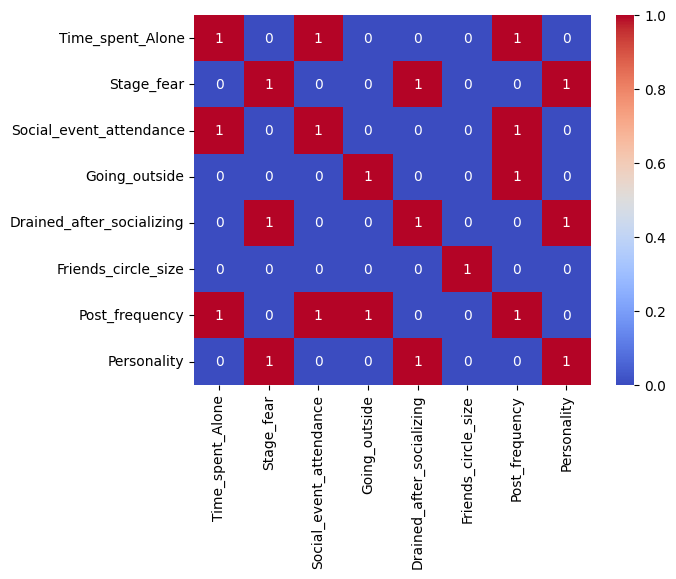

In [87]:
sns.heatmap(final_df,annot=True,cmap="coolwarm")

In [88]:
df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
id,,,,,,,,
0,4.0,0,4.0,6.0,0,13.0,5.0,0
1,9.0,1,0.0,0.0,1,0.0,3.0,1
4,3.0,0,9.0,4.0,0,8.0,5.0,0
5,1.0,0,7.0,5.0,0,6.0,6.0,0
6,4.0,0,9.0,3.0,0,7.0,7.0,0
...,...,...,...,...,...,...,...,...
2895,3.0,0,7.0,6.0,0,6.0,6.0,0
2896,3.0,0,8.0,3.0,0,14.0,9.0,0
2897,4.0,1,1.0,1.0,1,4.0,0.0,1


In [89]:
df['Time_spent_Alone'].skew()

np.float64(0.52521035569341)

# **Skewness & Kurtosis**

In [90]:
import plotly.express as px
import seaborn as sns

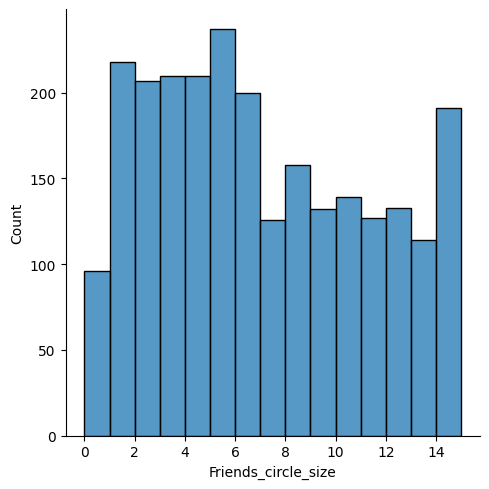

In [93]:
sns.displot(df['Friends_circle_size'])

In [94]:
df['Friends_circle_size'].mode()

,Friends_circle_size
0,5.0


In [95]:
df['Friends_circle_size'].mean()

np.float64(6.580129991346957)

In [99]:
#Steps to identify skewness.
# case 1: output inbetween (-0.5 to 0.5) Less skewness. Can be neglected.
# case 2: output inbetween (-1 to -0.5 or 0.5 to 1) moderately skewness. Can be considered for transmission.
# case 3: output inbetween (less than -1 or greater than 1) highly skewness. advisable to be considered for transmission.
#if the data is high for case 3,then transformation is highly recommended. If data is low, it is not recommended.

In [96]:
df['Friends_circle_size'].skew()

np.float64(0.30971832582682957)

In [101]:
for i in df.columns:
  print(i, df[i].skew())

Time_spent_Alone 0.52521035569341
Stage_fear 0.25520463973589397
Social_event_attendance 0.17659076883437774
Going_outside 0.06083861966964972
Drained_after_socializing 0.2584886325586226
Friends_circle_size 0.30971832582682957
Post_frequency 0.35756188385113613
Personality 0.24864270884641612


In [98]:
#Steps to identify kurtosis.
# case 1: output inbetween (-3 to 3) Less kurtosis. Can be neglected.
# case 2: output inbetween (-6 to -3 or 3 to 6) moderately kurtosis. Can be considered for transmission.
# case 3: output inbetween (less than -6 or greater than 6) highly kurtosis. advisable to be considered for transmission.
#if the data is high for case 3,then transformation is highly recommended. If data is low, it is not recommended.

In [97]:
df['Friends_circle_size'].kurtosis()

np.float64(-1.046984048020151)

In [100]:
for i in df.columns:
  print(i, df[i].kurtosis())

Time_spent_Alone -0.9717432227975271
Stage_fear -1.9364216112275956
Social_event_attendance -1.1501034193845545
Going_outside -1.2331794182579834
Drained_after_socializing -1.934733294473072
Friends_circle_size -1.046984048020151
Post_frequency -1.119189147236839
Personality -1.9397304719166066


**This dataset has less skewness and less kurtosis which can be neglected**

# **Outliers**

In [102]:
px.box(df,y="Friends_circle_size", points = "all")

In [109]:
px.box(df,x="Friends_circle_size", points = "all")

Based on the box plots generated for the continuous variables (`Time_spent_Alone`, `Social_event_attendance`, `Going_outside`, `Friends_circle_size`, and `Post_frequency`), it appears that there are several outliers present in these features. Outliers can be observed as individual points extending beyond the whiskers of the box plots. While some variables like `Going_outside` and `Post_frequency` show fewer outliers, others such as `Time_spent_Alone` and `Friends_circle_size` have a noticeable number of values that fall far from the central tendency of the data.